In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Transaction

In [11]:
tr = pd.read_parquet(r"../../data/processed_data/transaction.parquet")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/processed_data/transaction.parquet'

In [ ]:
print(tr.columns.to_list())#columnas de el set de datos

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [ ]:
tr.sample(10)# muestra de los datos

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
429273,3416273,0,10856979,200.00,S,16271,336.0,150.0,visa,195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437847,3424847,0,11066749,77.00,W,12577,268.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351927,3338927,0,8695761,20.00,H,15063,514.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118745,3105745,0,2318272,29.00,W,17131,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149262,3136262,0,3083839,116.00,W,6951,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374343,3361343,0,9324714,53.97,W,10057,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211372,3198372,0,4904956,59.00,W,4030,174.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126229,3113229,0,2498322,2049.59,W,5137,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291589,3278589,0,7177506,151.00,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
568722,3555722,0,15092578,30.00,S,3653,517.0,150.0,mastercard,224.0,...,4.0,45.0,586.0,160.0,0.0,389.0,75.0,45.0,197.0,85.0


In [ ]:
tr.shape # dimensiones de el set de datos (filas,columnas)

(590540, 394)

## TransactionID

In [ ]:
tr["TransactionID"].isna().sum()#cantidad de nulos

0

In [ ]:
tr["TransactionID"].duplicated().sum() #cantidad de duplicados

0

posee el identificador unico de la transaction

    no posee nulos
    no posee duplicados

## isFraud

In [ ]:
tr["isFraud"].isna().sum()#cantidad de nulos

0

In [ ]:
tr["isFraud"].value_counts()# frecuencia de sus diferentes valores

isFraud
0    569877
1     20663
Name: count, dtype: int64

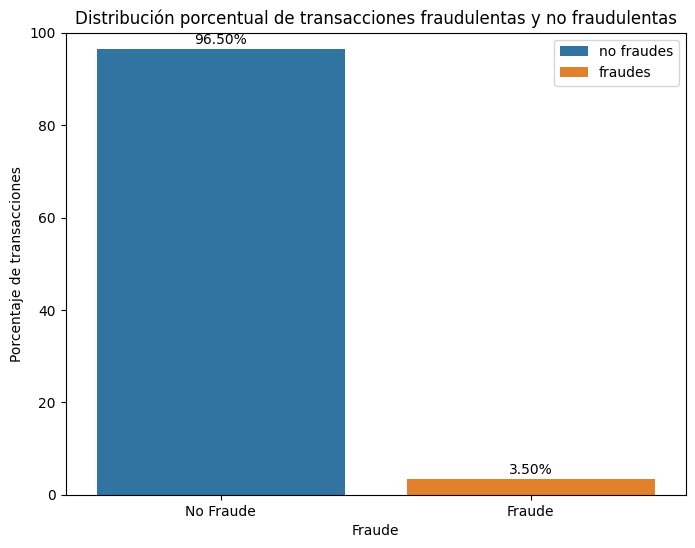

In [ ]:
fraud_counts = tr['isFraud'].value_counts(normalize=True) * 100

df_percent = fraud_counts.reset_index()
df_percent.columns = ['isFraud', 'percentage']

plt.figure(figsize=(8, 6))
sns.barplot(x='isFraud', y='percentage', data=df_percent, hue=["no fraudes","fraudes"])
plt.xlabel('Fraude')
plt.ylabel('Porcentaje de transacciones')
plt.title('Distribución porcentual de transacciones fraudulentas y no fraudulentas')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.ylim(0, 100)

# Mostrar los porcentajes encima de las barras
for i, v in enumerate(df_percent['percentage']):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()

esta columna posee un valor booleano que corresponde a si la transaccion es fraudulenta

    no posee nulos
    de el total de 590540 solo un 3.50% son casos de fraude

## TransactionDT

In [ ]:
tr["TransactionDT"]#muestra de los valores

0            86400
1            86401
2            86469
3            86499
4            86506
            ...   
590535    15811047
590536    15811049
590537    15811079
590538    15811088
590539    15811131
Name: TransactionDT, Length: 590540, dtype: int64

In [ ]:
from datetime import datetime, timedelta #importando módulos de tiempo

In [ ]:
# Convertir segundos a un formato de fecha y hora
tr['TransactionDT'] = pd.to_datetime(tr['TransactionDT'], unit='s')

# Calcular la cantidad de segundos adicionales desde 1970 hasta 2023
seconds_to_add = (datetime(2023, 1, 1) - datetime(1970, 1, 1)).total_seconds()

# Ajustar la columna TransactionDT para que los registros sean de 2023
tr['TransactionDT'] = tr['TransactionDT'] + timedelta(seconds=seconds_to_add)

In [ ]:
tr

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,2023-01-02 00:00:00,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,2023-01-02 00:00:01,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,2023-01-02 00:01:09,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,2023-01-02 00:01:39,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,2023-01-02 00:01:46,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,2023-07-02 23:57:27,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,2023-07-02 23:57:29,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,2023-07-02 23:57:59,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,2023-07-02 23:58:08,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


posee el tiempo transcurrido en segundos desde un punto de tiempo

    registros de 7 meses
    

## transactionAmt

In [ ]:
tr["TransactionAmt"].isna().sum()# cantidad de nulos

0

In [ ]:
tr["TransactionAmt"].value_counts()#valores y frecuencias

TransactionAmt
59.000     30582
117.000    28933
107.950    23954
57.950     23600
100.000    20362
           ...  
215.550        1
298.600        1
203.270        1
105.614        1
400.780        1
Name: count, Length: 20902, dtype: int64

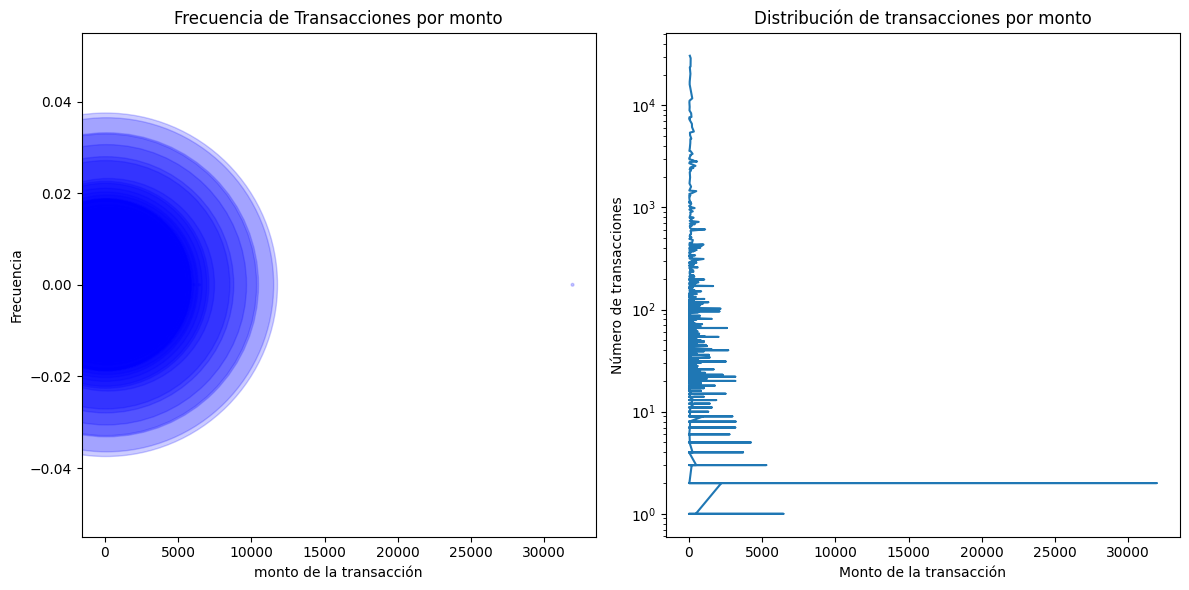

In [ ]:
ta = pd.DataFrame(tr["TransactionAmt"].value_counts())
value_counts = tr["TransactionAmt"].value_counts()
df_value_counts = value_counts.reset_index()
df_value_counts.columns = ["TransactionAmt", "Count"]


# Obtener la frecuencia de cada valor en TransactionAmt
freq_counts = tr['TransactionAmt'].value_counts()

# Crear un gráfico de dispersión con el tamaño de los puntos representando la frecuencia

# Crear una figura de tamaño (12, 6)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Crear el scatter plot en el primer subplot (ax0)
ax0 = axs[0]
ax0.scatter(freq_counts.index, [0]*len(freq_counts), s=freq_counts.values*2, alpha=0.2,color="b")
ax0.set_xlabel('monto de la transacción')
ax0.set_ylabel('Frecuencia')
ax0.set_title('Frecuencia de Transacciones por monto')

# Crear el scatter plot con escala logarítmica en el segundo subplot (ax1)
ax1 = axs[1]
ax1.semilogy(df_value_counts["TransactionAmt"], df_value_counts["Count"])
ax1.set_xlabel("Monto de la transacción")
ax1.set_ylabel("Número de transacciones")
ax1.set_title("Distribución de transacciones por monto")

# Ajustar el layout del subplot
plt.tight_layout()



podemos ver que:

    la frecuencia de transacciones disminuyen con el monto es decir hay mas transacciones por un monto bajo que por un monto mayor
    tambien podemos notar un valor atipico de mas de 30.000 
    el monto de transacción se encuentra en dolares


## ProductCD

In [ ]:
tr["ProductCD"].isna().sum()#cantidad de nulos

0

In [ ]:
tr["ProductCD"].value_counts()#valores y frecuencias

ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

significado de la columna:

    desconocido

## card1-card6

In [ ]:
tr["card1"].isna().sum()# cantidad de nulos

0

In [ ]:
tr["card1"].value_counts()# valores y frecuencias

card1
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
         ...  
17084        1
14620        1
11440        1
13231        1
18038        1
Name: count, Length: 13553, dtype: int64

In [ ]:
tr["card2"].isna().sum()# cantidad de nulos

8933

In [ ]:
tr["card3"].isna().sum()# cantidad de nulos

1565

In [ ]:
tr["card4"].isna().sum()# cantidad de nulos

1577

In [ ]:
tr["card4"].head(3)#vista de valores

0      discover
1    mastercard
2          visa
Name: card4, dtype: object

In [ ]:
tr["card5"].isna().sum()# cantidd de nulos

4259

In [ ]:
tr["card5"].value_counts()# valores y frecuencias

card5
226.0    296546
224.0     81513
166.0     57140
102.0     29105
117.0     25941
          ...  
221.0         1
167.0         1
115.0         1
165.0         1
234.0         1
Name: count, Length: 119, dtype: int64

In [ ]:
tr["card6"].isna().sum()# cantidad de nulos

1571

In [ ]:
tr["card6"].value_counts()# valores y frecuencias

card6
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: count, dtype: int64

conclusion:

    card1 - significado desconocido
    card2 - significado desconocido
    card3 - significado desconocido
    card4 - posee valores relacionados a la marca de la tarjeta
    card5 - significado desconocido
    card6 - posee el tipo de tarjeta

In [ ]:
# borrando columnas desconocidas
del tr["card1"]
del tr["card2"]
del tr["card3"]
del tr["card5"]

## addr1 - addr2

In [ ]:
tr["addr1"].isna().sum()# cantidad de nulos

65706

In [ ]:
tr["addr1"].value_counts()# valores y frecuencias

addr1
299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
         ...  
386.0        1
101.0        1
353.0        1
516.0        1
245.0        1
Name: count, Length: 332, dtype: int64

In [ ]:
tr["addr2"].isna().sum()# cantidad de nulos

65706

In [ ]:
tr["addr2"].value_counts()# valores y frecuencias

addr2
87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
         ...  
49.0         1
14.0         1
25.0         1
22.0         1
93.0         1
Name: count, Length: 74, dtype: int64

conclusion:

    addr1 - significado desconocido
    addr2 - significado desconocido

In [ ]:
# borrando columnas desconocidas
del tr["addr1"]
del tr["addr2"]

##  dist1 - dist2

In [ ]:
tr["dist1"]# vista de los valores

0          19.0
1           NaN
2         287.0
3           NaN
4           NaN
          ...  
590535     48.0
590536      NaN
590537      NaN
590538      3.0
590539      NaN
Name: dist1, Length: 590540, dtype: float64

In [ ]:
tr["dist2"]# vista de los valores

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
590535   NaN
590536   NaN
590537   NaN
590538   NaN
590539   NaN
Name: dist2, Length: 590540, dtype: float64

conclusion:

    dist1 - significado desconocido
    dist2 - significado desconocido

In [ ]:
# borrando columnas desconocidas
del tr["dist1"]
del tr["dist2"]

## P_emaildomain - R_emaildomain

In [ ]:
tr["P_emaildomain"]# vista de valores

0                None
1           gmail.com
2         outlook.com
3           yahoo.com
4           gmail.com
             ...     
590535           None
590536      gmail.com
590537      gmail.com
590538        aol.com
590539      gmail.com
Name: P_emaildomain, Length: 590540, dtype: object

In [ ]:
tr["R_emaildomain"]# vista de valores

0         None
1         None
2         None
3         None
4         None
          ... 
590535    None
590536    None
590537    None
590538    None
590539    None
Name: R_emaildomain, Length: 590540, dtype: object

In [ ]:
tr["R_emaildomain"].value_counts()# valores y frecuencias

R_emaildomain
gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
ymail.com             207
prodigy.net.mx        207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               5

las columnas:

    contienen valores relaciondo a el dominio de correo electrónico
    poseen valores nulos
    P_emaildomain posee el dominio de correo de la persona que realiza el pago en la transacción.
    R_emaildomain posee el dominio de correo electrónico del receptor  mayor cantidad de nulos dado que no siempre corresponde ya que no todas las transacciones requieren que se registre el correo electrónico del receptor.


# las siguientes columnas solo poseen valores que el modelo puede interpretar

## C1 - C14

In [ ]:
# Filtrar las columnas que contienen "C" en su nombre
c_columns = tr.filter(regex='^C\d+$', axis=1)


In [ ]:
c_columns

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0
590536,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590537,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590538,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0


In [ ]:
tr.drop(c_columns,axis=1,inplace=True)

## D1 - D15

In [ ]:
# Filtrar las columnas que contienen "D" en su nombre
d_columns = tr.filter(regex='^D\d+$', axis=1)


In [ ]:
d_columns

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,56.0
590536,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
590537,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
590538,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,22.0


In [ ]:
tr.drop(d_columns,axis=1,inplace=True)

## M1 - M9

In [ ]:
# Filtrar las columnas que contienen "M" en su nombre
m_columns = tr.filter(regex='^M\d+$', axis=1)


In [ ]:
m_columns

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,None,None,None
1,None,None,None,M0,T,T,None,None,None
2,T,T,T,M0,F,F,F,F,F
3,None,None,None,M0,T,F,None,None,None
4,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
590535,T,T,T,M0,T,F,F,F,T
590536,T,F,F,M0,F,T,F,F,F
590537,T,F,F,None,None,T,None,None,None
590538,T,T,T,M0,F,T,None,None,None


In [ ]:
tr.drop(m_columns,axis=1,inplace=True)

## V1 - vX...

In [ ]:
# Filtrar las columnas que contienen "V" en su nombre
v_columns = tr.filter(regex='^V\d+$', axis=1)


In [ ]:
v_columns

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tr.drop(v_columns,axis=1,inplace=True)

## datos de transacciones final

In [ ]:
tr

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain
0,2987000,0,2023-01-02 00:00:00,68.50,W,discover,credit,None,None
1,2987001,0,2023-01-02 00:00:01,29.00,W,mastercard,credit,gmail.com,None
2,2987002,0,2023-01-02 00:01:09,59.00,W,visa,debit,outlook.com,None
3,2987003,0,2023-01-02 00:01:39,50.00,W,mastercard,debit,yahoo.com,None
4,2987004,0,2023-01-02 00:01:46,50.00,H,mastercard,credit,gmail.com,None
...,...,...,...,...,...,...,...,...,...
590535,3577535,0,2023-07-02 23:57:27,49.00,W,visa,debit,None,None
590536,3577536,0,2023-07-02 23:57:29,39.50,W,mastercard,debit,gmail.com,None
590537,3577537,0,2023-07-02 23:57:59,30.95,W,mastercard,debit,gmail.com,None
590538,3577538,0,2023-07-02 23:58:08,117.00,W,mastercard,debit,aol.com,None


In [ ]:
tr.to_csv("../../data/processed_data/transaction_old.csv",index=False)#guardando archivo

<hr>

# Identity

In [ ]:
id = pd.read_parquet(r"../../data/processed_data/identity.parquet")

In [ ]:
id

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,None,None,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,None,None,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,None,None,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,None,None,F,F,T,F,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286135,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,None,None,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
286136,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
286137,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,None,None,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
286138,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


## TransactionID

In [ ]:
id["TransactionID"].isna().sum()

0

In [ ]:
id["TransactionID"].duplicated().sum()

0

##  id-01 - id-32

In [ ]:
# Filtrar las columnas que contienen "id" en su nombre
id_columns = id.filter(regex='id', axis=1)


In [ ]:
id_columns.dropna()

,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,...,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38
64,-25.0,1900.0,0.0,0.0,-27.0,-100.0,2.0,-100.0,0.0,0.0,...,Found,Linux,chrome 67.0,24.0,1920x1080,match_status:2,T,F,T,T
118,-40.0,44218.0,0.0,0.0,6.0,-32.0,26.0,-34.0,0.0,0.0,...,Found,Android 8.0.0,samsung browser 7.0,32.0,2220x1080,match_status:2,T,F,T,T
248,-10.0,168694.0,0.0,0.0,-1.0,-25.0,21.0,-35.0,0.0,0.0,...,Found,iOS 11.4.0,mobile safari 11.0,32.0,2208x1242,match_status:2,T,F,F,F
307,-29.0,1392.0,0.0,0.0,-26.0,-47.0,-8.0,-100.0,0.0,0.0,...,Found,Linux,chrome 67.0,24.0,1920x1080,match_status:2,T,F,T,T
391,-25.0,1392.0,0.0,0.0,-16.0,-51.0,13.0,-100.0,0.0,0.0,...,Found,Linux,chrome 67.0,24.0,1920x1080,match_status:2,T,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285447,-6.0,1904.0,0.0,0.0,-2.0,-49.0,-3.0,-48.0,0.0,0.0,...,Found,Linux,chrome 64.0,24.0,1366x768,match_status:2,T,F,T,T
285467,-5.0,2519.0,0.0,0.0,-2.0,-49.0,7.0,-48.0,0.0,0.0,...,Found,Linux,chrome 64.0,24.0,1366x768,match_status:2,T,F,T,T
285498,-20.0,1408.0,0.0,0.0,15.0,-33.0,20.0,-100.0,0.0,0.0,...,Found,Android 6.0.1,samsung browser 4.0,32.0,1920x1080,match_status:2,T,F,T,T
285790,-5.0,1482.0,0.0,0.0,2.0,-33.0,8.0,-33.0,0.0,0.0,...,Found,Linux,chrome 66.0,24.0,2961x1442,match_status:2,T,F,T,T


    descartaremos las columnas anonimizadas con valores que no se pueden entender de que se tratan 

In [ ]:
del id_columns["id-01"]
del id_columns["id-02"]
del id_columns["id-03"]
del id_columns["id-04"]
del id_columns["id-05"]
del id_columns["id-06"]
del id_columns["id-07"]
del id_columns["id-08"]
del id_columns["id-09"]
del id_columns["id-10"]

In [ ]:
id["id-32"].value_counts()

id-32
24.0    104040
32.0     44077
16.0       121
8.0         11
0.0          6
48.0         2
Name: count, dtype: int64

In [ ]:
del id_columns["id-29"]
del id_columns["id-32"]
del id_columns["id-34"]
del id_columns["id-35"]
del id_columns["id-36"]
del id_columns["id-37"]
del id_columns["id-38"]

In [ ]:
id_columns.dropna()

,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,...,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-30,id-31,id-33
57,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,12.0,317.0,597.0,...,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,100.0,Found,New,iOS 11.3.0,mobile safari 11.0,2001x1125
64,100.0,Found,11.0,-300.0,Found,Found,166.0,26.0,122.0,535.0,...,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,137.0,Found,Found,Linux,chrome 67.0,1920x1080
117,100.0,NotFound,11.0,-480.0,Found,NotFound,166.0,12.0,317.0,222.0,...,14.0,IP_PROXY:TRANSPARENT,21.0,321.0,169.0,Found,Found,Android 8.0.0,samsung browser 7.0,2220x1080
118,100.0,Found,11.0,-480.0,Found,Found,166.0,12.0,317.0,222.0,...,14.0,IP_PROXY:TRANSPARENT,21.0,321.0,169.0,Found,Found,Android 8.0.0,samsung browser 7.0,2220x1080
169,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,13.0,317.0,597.0,...,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,100.0,Found,New,iOS 11.4.0,mobile safari 11.0,2048x1536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285724,100.0,Found,27.0,-480.0,New,NotFound,166.0,18.0,122.0,222.0,...,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,New,iOS 11.0.0,mobile safari 11.0,2208x1242
285790,100.0,Found,55.0,-300.0,Found,Found,166.0,12.0,122.0,256.0,...,14.0,IP_PROXY:TRANSPARENT,21.0,321.0,102.0,Found,Found,Linux,chrome 66.0,2961x1442
285842,100.0,NotFound,52.0,-300.0,New,NotFound,166.0,13.0,193.0,533.0,...,14.0,IP_PROXY:HIDDEN,21.0,426.0,184.0,Found,New,Windows 7,chrome 66.0,1600x900
286114,100.0,NotFound,15.0,-420.0,Found,Found,166.0,12.0,317.0,222.0,...,14.0,IP_PROXY:TRANSPARENT,15.0,321.0,161.0,Found,Found,iOS 11.3.0,mobile safari 11.0,2436x1125


In [ ]:
del id_columns["id-11"]
del id_columns["id-12"]
del id_columns["id-13"]
del id_columns["id-14"]
del id_columns["id-15"]
del id_columns["id-16"]
del id_columns["id-17"]
del id_columns["id-18"]
del id_columns["id-19"]
del id_columns["id-20"]
del id_columns["id-21"]
del id_columns["id-22"]
del id_columns["id-24"]
del id_columns["id-25"]
del id_columns["id-26"]
del id_columns["id-27"]
del id_columns["id-28"]

In [ ]:
id_columns.dropna()# estas son laas columnas con valores que podemos entender

,id-23,id-30,id-31,id-33
57,IP_PROXY:TRANSPARENT,iOS 11.3.0,mobile safari 11.0,2001x1125
64,IP_PROXY:TRANSPARENT,Linux,chrome 67.0,1920x1080
117,IP_PROXY:TRANSPARENT,Android 8.0.0,samsung browser 7.0,2220x1080
118,IP_PROXY:TRANSPARENT,Android 8.0.0,samsung browser 7.0,2220x1080
169,IP_PROXY:TRANSPARENT,iOS 11.4.0,mobile safari 11.0,2048x1536
...,...,...,...,...
285990,IP_PROXY:ANONYMOUS,Windows 10,chrome 65.0,1920x1080
286020,IP_PROXY:ANONYMOUS,Windows 10,ie 11.0 for tablet,2560x1440
286114,IP_PROXY:TRANSPARENT,iOS 11.3.0,mobile safari 11.0,2436x1125
286120,IP_PROXY:ANONYMOUS,Windows 7,ie 11.0 for desktop,1024x768


In [ ]:
del id["id-01"]
del id["id-02"]
del id["id-03"]
del id["id-04"]
del id["id-05"]
del id["id-06"]
del id["id-07"]
del id["id-08"]
del id["id-09"]
del id["id-10"]
del id["id-11"]
del id["id-12"]
del id["id-13"]
del id["id-14"]
del id["id-15"]
del id["id-16"]
del id["id-17"]
del id["id-18"]
del id["id-19"]
del id["id-20"]
del id["id-21"]
del id["id-22"]
del id["id-24"]
del id["id-25"]
del id["id-26"]
del id["id-27"]
del id["id-28"]
del id["id-29"]
del id["id-32"]
del id["id-34"]
del id["id-35"]
del id["id-36"]
del id["id-37"]
del id["id-38"]

In [ ]:
id

,TransactionID,id-23,id-30,id-31,id-33,DeviceType,DeviceInfo
0,3663586,None,None,chrome 67.0 for android,None,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,None,Android 6.0.1,chrome 67.0 for android,1280x720,mobile,LGLS676 Build/MXB48T
2,3663597,None,None,ie 11.0 for tablet,None,desktop,Trident/7.0
3,3663601,None,None,chrome 67.0 for android,None,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,None,None,chrome 67.0 for android,None,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...
286135,3577521,None,None,chrome 66.0 for android,None,mobile,F3111 Build/33.3.A.1.97
286136,3577526,None,Android 7.1.1,chrome 55.0 for android,855x480,mobile,A574BL Build/NMF26F
286137,3577529,None,None,chrome 65.0 for android,None,mobile,Moto E (4) Plus Build/NMA26.42-152
286138,3577531,None,Mac OS X 10_9_5,chrome 66.0,2560x1600,desktop,MacOS


## DeviceType

In [ ]:
id["DeviceType"].isna().sum()

8399

In [ ]:
id["DeviceType"].value_counts()

DeviceType
desktop    159568
mobile     118173
Name: count, dtype: int64

    contiene el tipo de dispositivo asociado a la transaccion

## DeviceInfo

In [ ]:
id["DeviceInfo"].isna().sum()

52417

In [ ]:
id["DeviceInfo"].value_counts()

DeviceInfo
Windows        92710
iOS Device     38502
MacOS          23722
Trident/7.0    12330
rv:11.0         2650
               ...  
5033A              1
ASUS_Z00ED         1
V.40R              1
SM-G360M           1
D5303              1
Name: count, Length: 2799, dtype: int64

    contiene informacion sobre el sistema operativo o modelo de el dispositivo

In [ ]:
id

,TransactionID,id-23,id-30,id-31,id-33,DeviceType,DeviceInfo
0,3663586,None,None,chrome 67.0 for android,None,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,None,Android 6.0.1,chrome 67.0 for android,1280x720,mobile,LGLS676 Build/MXB48T
2,3663597,None,None,ie 11.0 for tablet,None,desktop,Trident/7.0
3,3663601,None,None,chrome 67.0 for android,None,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,None,None,chrome 67.0 for android,None,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...
286135,3577521,None,None,chrome 66.0 for android,None,mobile,F3111 Build/33.3.A.1.97
286136,3577526,None,Android 7.1.1,chrome 55.0 for android,855x480,mobile,A574BL Build/NMF26F
286137,3577529,None,None,chrome 65.0 for android,None,mobile,Moto E (4) Plus Build/NMA26.42-152
286138,3577531,None,Mac OS X 10_9_5,chrome 66.0,2560x1600,desktop,MacOS


In [ ]:
id.to_csv("../../data/processed_data/identity.csv",index=False)#guardando archivo

<hr>

## datos de prueba de el modelo (solo datos de fraude)

In [ ]:
import pandas as pd

In [ ]:
tf = pd.read_csv(r"../../data/raw_data/test_transaction.csv")

In [ ]:
tf[["TransactionID","TransactionAmt","ProductCD","card4","card6","P_emaildomain","R_emaildomain"]]

,TransactionID,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain
0,3663549,31.950,W,visa,debit,gmail.com,NaN
1,3663550,49.000,W,visa,debit,aol.com,NaN
2,3663551,171.000,W,visa,debit,hotmail.com,NaN
3,3663552,284.950,W,visa,debit,gmail.com,NaN
4,3663553,67.950,W,mastercard,debit,gmail.com,NaN
...,...,...,...,...,...,...,...
506686,4170235,94.679,C,mastercard,debit,gmail.com,gmail.com
506687,4170236,12.173,C,mastercard,debit,hotmail.com,hotmail.com
506688,4170237,49.000,W,visa,debit,hotmail.com,NaN
506689,4170238,202.000,W,mastercard,debit,hotmail.com,NaN


In [ ]:
tf.to_csv(r"../../data/processed_data/transaction_fraud.csv",index=False)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3213922476.py, line 1)

In [23]:
df = pd.read_csv(r"../../data/processed_data/transactions.csv")

In [24]:
df

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain
0,0,2987000,0,2023-01-02 00:00:00,68.50,W,discover,credit,NaN,NaN
1,1,2987001,0,2023-01-02 00:00:01,29.00,W,mastercard,credit,gmail.com,NaN
2,2,2987002,0,2023-01-02 00:01:09,59.00,W,visa,debit,outlook.com,NaN
3,3,2987003,0,2023-01-02 00:01:39,50.00,W,mastercard,debit,yahoo.com,NaN
4,4,2987004,0,2023-01-02 00:01:46,50.00,H,mastercard,credit,gmail.com,NaN
...,...,...,...,...,...,...,...,...,...,...
590535,590535,3577535,0,2023-07-02 23:57:27,49.00,W,visa,debit,NaN,NaN
590536,590536,3577536,0,2023-07-02 23:57:29,39.50,W,mastercard,debit,gmail.com,NaN
590537,590537,3577537,0,2023-07-02 23:57:59,30.95,W,mastercard,debit,gmail.com,NaN
590538,590538,3577538,0,2023-07-02 23:58:08,117.00,W,mastercard,debit,aol.com,NaN


In [25]:
del df["Unnamed: 0"]

In [26]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,P_emaildomain,R_emaildomain
0,2987000,0,2023-01-02 00:00:00,68.50,W,discover,credit,NaN,NaN
1,2987001,0,2023-01-02 00:00:01,29.00,W,mastercard,credit,gmail.com,NaN
2,2987002,0,2023-01-02 00:01:09,59.00,W,visa,debit,outlook.com,NaN
3,2987003,0,2023-01-02 00:01:39,50.00,W,mastercard,debit,yahoo.com,NaN
4,2987004,0,2023-01-02 00:01:46,50.00,H,mastercard,credit,gmail.com,NaN
...,...,...,...,...,...,...,...,...,...
590535,3577535,0,2023-07-02 23:57:27,49.00,W,visa,debit,NaN,NaN
590536,3577536,0,2023-07-02 23:57:29,39.50,W,mastercard,debit,gmail.com,NaN
590537,3577537,0,2023-07-02 23:57:59,30.95,W,mastercard,debit,gmail.com,NaN
590538,3577538,0,2023-07-02 23:58:08,117.00,W,mastercard,debit,aol.com,NaN


In [27]:
df.to_csv(r"../../data/processed_data/transactions.csv",index=False)